**Coursebook: Regression Model**

- Bagian 4 Audit Analytics untuk Bank Rakyat Indonesia
- Durasi: 7 Jam
- *Last Updated*: December 2023

___


- *Coursebook* ini disusun dan dikurasi oleh tim produk dan instruktur dari [Algoritma Data Science School](https://algorit.ma/)

# Background

*Coursebook* ini merupakan bagian dari **BRI Audit Analytics** yang disiapkan oleh [Algoritma](https://algorit.ma). *Coursebook* ini ditujukan hanya untuk khalayak terbatas, yaitu individu dan organisasi yang menerima *coursebook* ini langsung dari organisasi pelatihan. Tidak boleh direproduksi, didistribusikan, diterjemahkan, atau diadaptasi dalam bentuk apapun di luar individu dan organisasi ini tanpa izin.
Algoritma adalah pusat pendidikan *data science* yang berbasis di Jakarta. Kami menyelenggarakan *workshop* dan program pelatihan untuk membantu para profesional dan mahasiswa dalam menguasai berbagai sub-bidang *data science* yaitu: *data visualization, machine learning,* statistik, dan lain sebagainya.

## Training Objectives

Kita akan memulai dengan mempelajari apa itu *machine learning* secara umum dan mempelajari model regresi pertama Anda. Pada *coursebook* ini kita akan membahas:

- **Data Preparation & Exploratory Data**  

    - Data types inspection & preparation
    - Statistics summary
    - Correlation and distribution from several variables

- **Data Pre-Processing**  

    - Target & predictors separation
    - Dummy Variables for Categorical Predictor
    
- **Linear Model**  

    - Ordinary Least Square
    - Linear Regression
    - Linear Model Prediction
    - Plotting Regression

- **Interpreting Linear Models**

    - Understanding Coefficients
    - Estimates and standard error 
    - Confidence interval 


- **Model Assumptions and Evaluation**

    - Model assumptions
    - Model evaluation

# Data Preparation

Sebelum masuk ke topik utama pada coursebook ini, mari kita import terlebih dahulu beberapa library yang akan digunakan:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# suppress scientific notation
np.set_printoptions(suppress=True) # numpy output
pd.set_option('display.float_format', lambda x: '%.5f' % x) # pandas output

# suppress warning
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

Setelah menentukan library yang akan digunakan maka kita akan melakukan persiapan data terlebih dahulu.

In [4]:
copiers = pd.read_csv("data_input/copiers.csv")
copiers.sample(5)

,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Segment,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit
46,CA-2016-139997,7/1/16,7/3/16,First Class,EM-14140,Home Office,TEC-CO-10000971,Technology,Copiers,Hewlett Packard 310 Color Digital Copier,1499.95000,5,0.00000,449.98500
9,CA-2015-111829,3/19/15,3/20/15,First Class,FH-14365,Corporate,TEC-CO-10001766,Technology,Copiers,Canon PC940 Copier,3149.93000,7,0.00000,1480.46710
15,US-2015-100377,8/28/15,9/1/15,Standard Class,TS-21370,Corporate,TEC-CO-10001046,Technology,Copiers,Canon Imageclass D680 Copier / Fax,2799.96000,5,0.20000,874.98750
41,US-2017-135013,7/24/17,7/24/17,Same Day,HR-14830,Corporate,TEC-CO-10001449,Technology,Copiers,Hewlett Packard LaserJet 3310 Copier,2399.96000,5,0.20000,839.98600
3,CA-2017-127432,1/22/17,1/27/17,Standard Class,AD-10180,Home Office,TEC-CO-10003236,Technology,Copiers,Canon Image Class D660 Copier,2999.95000,5,0.00000,1379.97700


In [3]:
copiers.shape

(62, 14)

Data di atas merupakan data historis transaksi dari suatu online retail, berikut deskripsi variabel dari data tersebut:

- `Order.ID`     : ID transaksi
- `Order.Date`   : Tanggal transaksi
- `Ship.Date`    : Tanggal pengiriman barang
- `Ship.Mode`    : Jenis pengiriman yang digunakan (Standard Class, Second Class, First Class, Same Day)
- `Customer.ID`  : ID pelanggan
- `Segment`      : Segmen pelanggan (Consumer, Corporate, Home Office)
- `Product.ID`   : ID barang
- `Category`     : Kategori barang
- `Sub.Categoory`: Sub kategori barang
- `Product.Name` : Nama barang
- `Sales`        : Harga barang (USD)
- `Quantity`     : Jumlah barang yang dibeli
- `Discount`     : Potongan harga (%)
- `Profit`       : Keuntungan yang diperoleh (USD)

Berdasarkan informasi di atas, kita akan melihat tipe data pada seluruh variabel yang kita miliki:

In [5]:
copiers.dtypes

Order.ID         object
Order.Date       object
Ship.Date        object
Ship.Mode        object
Customer.ID      object
Segment          object
Product.ID       object
Category         object
Sub.Category     object
Product.Name     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

Beberapa variabel yang nilainya berulang sebaiknya kita ubah terlebih dahulu ke dalam tipe kategori. Variabel-variabel ini diketahui berdasarkan keterangan data sebelumnya.

In [6]:
cat_var = ["Ship.Mode", "Segment", "Category", "Sub.Category"]
date_var = ['Order.Date', 'Ship.Date']

copiers[cat_var] = copiers[cat_var].astype("category")
copiers[date_var] = copiers[date_var].astype("datetime64[ns]")

copiers.dtypes

Order.ID                object
Order.Date      datetime64[ns]
Ship.Date       datetime64[ns]
Ship.Mode             category
Customer.ID             object
Segment               category
Product.ID              object
Category              category
Sub.Category          category
Product.Name            object
Sales                  float64
Quantity                 int64
Discount               float64
Profit                 float64
dtype: object

Setelah tipe datanya berubah, kita dapat melihat secara lebih mendetail informasi pada data kita. Hal pertama yang akan kita tinjau adalah deskripsi statistik dari data kita.

In [7]:
copiers.describe()

,Order.Date,Ship.Date,Sales,Quantity,Discount,Profit
count,62,62,62.00000,62.00000,62.00000,62.00000
mean,2016-04-06 18:34:50.322580736,2016-04-10 08:30:58.064516096,1331.10155,3.30645,0.16774,448.80549
min,2014-05-02 00:00:00,2014-05-04 00:00:00,299.99000,1.00000,0.00000,59.99800
25%,2015-05-17 00:00:00,2015-05-23 18:00:00,599.97250,2.00000,0.00000,161.99190
50%,2016-02-20 00:00:00,2016-02-23 12:00:00,979.98200,3.00000,0.20000,313.49215
75%,2017-03-22 00:00:00,2017-03-22 18:00:00,1749.95750,5.00000,0.20000,611.23825
max,2017-12-24 00:00:00,2017-12-25 00:00:00,4899.93000,8.00000,0.40000,2302.96710
std,NaN,NaN,966.49320,1.76104,0.12646,434.97181


Secara default, metode `describe()` hanya akan menampilkan data-data dengan tipe numerik. Agar kita dapat melihat data dengan tipe kategorik maka kita gunakan parameter include.

In [8]:
copiers.describe(include="category")

,Ship.Mode,Segment,Category,Sub.Category
count,62,62,62,62
unique,4,3,1,1
top,Standard Class,Consumer,Technology,Copiers
freq,32,32,62,62


Sampai tahapan ini, kita telah mengubah tipe data dan melihat secara singkat deskripsi statistik dari data kita. Hal-hal tersebut merupakan tahapan penting sebelum kita dapat mengolah data kita ke tahap selanjutnya yaitu _machine learning_.

# Introduction to Machine Learning

_Machine learning_ pada dasarnya mengacu pada sub-bidang ilmu komputer yang "memberikan kemampuan kepada komputer untuk belajar tanpa harus diprogram secara eksplisit". Lebih sederhananya, hal ini berkaitan dengan teori dan aplikasi metode statistik dan matematika untuk mencapai tujuan tertentu tanpa mengikuti seperangkat aturan yang ditentukan secara kaku dan ketat.

*Machine learning* yang paling umum dibagi menjadi dua jenis, yaitu **_supervised learning_** dan **_unsupervised learning_**. Perbedaan antara keduanya adalah ketika kita membahas **_supervised learning_**, maka kita berusaha melakukan prediksi dari suatu nilai karena dalam supervised learning data yang akan kita analisis memiliki target variabel.

Data kita (yang umumnya berbentuk tabular) akan dipisahkan pada kasus supervised learning, menjadi target variable dan predictor variable:

- **_Target Variable_**: Satu buah variabel/kolom yang ingin kita prediksi nilainya, biasa disebut juga sebagai dependent variable.
- **_Predictor Variable_**: Variabel-variabel yang mempengaruhi target variabel atau nilai yang akan kita prediksi, biasa disebut juga sebagai independent variable.

Ketika target variable bersifat numerik (seperti harga minyak, curah hujan, penjualan, tekanan darah, dll), umumnya kasus ini disebut sebagai "regresi". Hal ini berbeda dengan masalah "klasifikasi", istilah umum untuk ketika nilai target variable kita bersifat kategorikal (_loan defaults_, deteksi _email spam, handwriting recognition_, dll).

Sementara itu, jika kita membahas tentang **_unsupervised learning_**, maka kita berusaha melakukan eksplorasi data karena data yang ingin kita proses tidak memiliki target variabel. Metode yang biasanya digunakan untuk menganalisis data menggunakan unsupervised learning adalah clustering atau data grouping.


# Regression Model

Metode _machine learning_ pertama yang akan kita pelajari yaitu model regresi. 

Penting untuk diingat bahwa model regresi tidak hanya digunakan dalam konteks _machine learning_ untuk prediksi numerik. Regresi, sebenarnya, merupakan "workhorse of data science" dan termasuk model yang paling praktis dan teoretis untuk dipahami dalam statistik. Model regresi linear merupakan metode statistik yang membentuk sebuah garis lurus berdasarkan data kita. Persamaan umumnya yaitu:

$$\hat Y=β_0+β_1X_1+β_2X_2+...+β_nX_n$$

_Data scientist_ yang terlatih dengan baik dengan ilmu dasar ini akan mampu mengatasi berbagai masalah karena model regresi sering menghasilkan model yang sangat dapat diinterpretasi. Kita dapat (dan seharusnya) mempertimbangkannya sebagai metode statistik yang berguna pada kebanyakan kasus _data science_ yang paling umum.

## Least Squares Regression

Salah satu istilah yang akan Anda dengar dalam course ini adalah **least squares** (kuadrat terkecil). Jadi mari kita coba dan memahami intuisi tentang konsep penting ini melalui ilustrasi berikut. Kita akan melanjutkan dan membaca suatu data dan membuat histogram dari data tersebut.

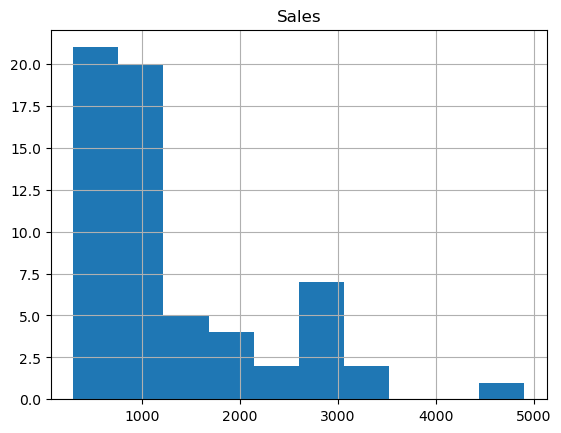

In [9]:
copiers.hist(column=['Sales']);

Ketika kita memiliki sebuah data (contoh: Profit mesin fotokopi) dengan distribusi penjualan seperti di atas dan kita ingin membuat perkiraan nilai yang paling representatif maka kita akan menghitung jumlah jarak kuadrat antara data yang kita perkirakan dengan data aslinya (_error_). Inilah konsep kuadrat terkecil atau _least square_. Tanpa informasi lain (variabel prediktor), _least square_ akan memprediksi nilai sebuah data dengan nilai rata-rata sampelnya.

Karena hasil estimasi model kita tidak akan benar-benar tepat jatuh di nilai asli data kita, maka dengan meminimalisir rata-rata kuadrat dari _error_ adalah pendekatan yang masuk akal dilakukan. 

Pendekatan _least square_ ini merupakan dasar dari metode regresi linear. Regresi linear akan membuat satu buah garis yang paling representatif terhadap data kita, kondisi garis paling representatif ini berdasarkan jarak minimum seperti yang sudah dijelaskan di atas.

## Simple Linear Regression

Secara sederhana, model regresi akan membuat satu buah garis linear yang berdasarkan gambaran data kita. Garis linear ini dituliskan pada persamaan $\hat Y=β_0+β_1X_1$. 

Berdasarkan persamaan di atas, kita harus menentukan "Y" sebagai target variabel dan "X" sebagai prediktor. Pemilihan "X" atau prediktor ini umumnya didasari oleh hubungan linear antara prediktor dengan target ("Y"). Hal ini dapat kita tinjau dengan melihat nilai korelasi. Berikut adalah cara pengecekan korelasi menggunakan metode `.corr()`.

In [10]:
copiers.corr(numeric_only=True).sort_values(
   'Profit', ascending=False 
).loc[:,'Profit']

Profit      1.00000
Sales       0.93958
Quantity    0.68599
Discount   -0.43234
Name: Profit, dtype: float64

Pada kasus dalam pembelajaran regresi linear ini, kita akan berusaha memprediksi profit penjualan mesin fotokopi (`Profit`) dan variabel dengan korelasi paling tinggi berdasarkan hasil eksplorasi korelasi di atas adalah `Sales` yang merepresentasikan harga barang. Nilai korelasi yang tinggi dapat membantu metode kita untuk mendapatkan hasil yang baik karena regresi linear didasari hubungan linear prediktor dengan target.

Oleh karena itu, pada kasus pertama kita yaitu regresi linear sederhana kita akan memprediksi `Profit`  berdasarkan `Sales`.

Pembuatan model regresi linear di Python merupakan proses yang mudah. Kita akan memanggil fungsi `OLS()` dari library `statsmodels` dan menentukan dua parameter utama: "Y" atau target variabel dan "X" atau prediktor. Kedua parameter ini harus dipisahkan dan sebaiknya didefinisikan sebelum membuat model. 

*__Notes__: *Nama variabel "Y" dan "X" tidaklah baku, kita dapat menentukan sesuai kebutuhan kita.*

In [11]:
import statsmodels.api as sm

Y = copiers['Profit']
X_simple = sm.add_constant(copiers['Sales']) 

# fit the model
lm_simple = sm.OLS(Y, X_simple).fit()
lm_simple.params

const   -114.06251
Sales      0.42286
dtype: float64

*__Note__: *Tanpa sm.add_constant, `statsmodels` akan menggunakan asumsi $β_0 = 0$ pada persamaan $\hat Y=β_0+β_1X_1$ sehingga nilai $β_0$ yang seharusnya dihitung berdasarkan data kita akan bernilai 0.*

Nilai yang dikeluarkan oleh `lm.params` adalah koefisien dari model linear yang dibuat. Nilai koefisien ini menggambarkan seberapa banyak pengaruh sebuah variabel terhadap target variabel kita. 

Jika kita lihat pada contoh di atas, kita memiliki nilai koefisien untuk variabel Tenure sebesar **0.423** dan karena nilai tersebut bertanda positif maka berdasarkan hubungan linear dari model kita dapat dikatakan bahwa dampak variabel tersebut terhadap Profit (target variabel) juga positif: semakin tinggi Sales maka semakin tinggi juga Profit. Sebaliknya, nilai koefisien negatif artinya kenaikan sebuah variabel akan menurunkan nilai targetnya.

Selain informasi di atas, kita juga dapat menyimpulkan persamaan regresi linear untuk penggunaan bandwidth tahunan akan mengikuti persamaan umum $\hat Y=β_0+β_1X_1$.

Jika persamaan di atas dituliskan dengan bahasa yang lebih sederhana menjadi: 
`Estimated Profit = Intercept + Slope * Sales`
dan jika nilai koefisien betanya kita masukkan ke dalam formula tersebut maka menjadi:
`Estimated Profit = -114.06 + 0.423 * Sales`

Dari persamaan tersebut kita dapat menyimpulkan bahwa **keuntungan diekspektasikan meningkat sebesar $0.423$ ketika sales meningkat $1$ satuan**. Jika nilai sales $0$ maka keuntungan diprediksi bernilai negatif (profit tanpa sales diperkirakan sebesar $-114.06$ USD).

Apabila kita memiliki pelanggan dengan nilai Sales 910, berapakah prediksi Profit berdasarkan model linear kita?

In [12]:
-114.06 + 0.423 * 910

270.87

Ternyata berdasarkan formula model linear, kita ketahui bahwa penggunaan Profit kita senilai 270.87 USD. Hal ini cukup mudah kita lakukan ketika hanya memiliki satu variabel dan menebak satu pelanggan, akan tetapi akan sulit ketika keduanya sudah lebih dari satu. Oleh karena itu, `statsmodels` memiliki fungsi `*.predict()` yang dapat melakukan prediksi berdasarkan input data kita. Fungsi predict membutuhkan informasi yang sama dengan X yang masuk pada model machine learning kita sebagai parameter pertamanya. Pada kasus kita artinya dataframe dengan sebuah nilai konstanta dan nilai tenure.

In [13]:
c=[1, 910]
lm_simple.predict(c)

array([270.73899142])

Berikut ini adalah contoh penggunaan `*.predict()` pada dataframe yang barisnya lebih dari satu.

In [15]:
lm_simple.predict(X_simple)[:5]

0    291.87517
1    647.07063
2    393.35789
3   1154.49273
4    393.35789
dtype: float64

Hasil prediksi menggunakan `*.predict()` kepada data X kita akan menghasilkan nilai yang sama dengan nilai `*.fittedvalues` pada model kita.

In [16]:
lm_simple.fittedvalues[:5]

0    291.87517
1    647.07063
2    393.35789
3   1154.49273
4    393.35789
dtype: float64

Dan berdasarkan informasi tersebut, marilah kita buat plot hubungan antara Sales dengan Profit tetapi dengan tambahan sebuah garis yang dihasilkan dari prediksi model linear kita:

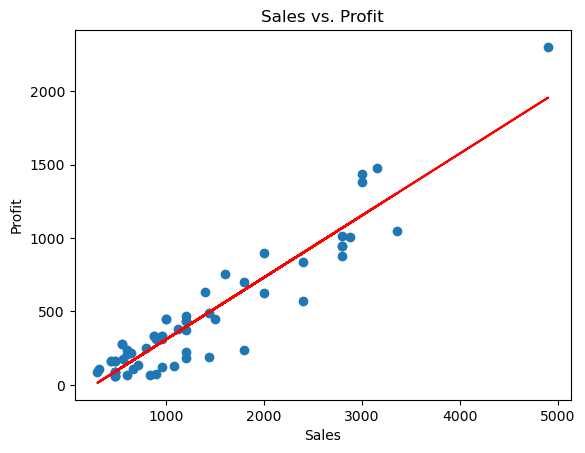

In [17]:
plt.scatter(copiers['Sales'],  copiers['Profit']);
plt.plot(copiers['Sales'], lm_simple.fittedvalues, c='r');
plt.xlabel('Sales');
plt.ylabel('Profit');
plt.title('Sales vs. Profit');

Ternyata, garis tersebut adalah garis regresi terbaik untuk data asli kita. Garis ini telah disesuaikan dengan kondisi error karena titik-titik observasinya tidak diprediksi dengan sempurna oleh garis (meskipun mereka berada di sekitar garis), dan model linear kita telah memperkirakan garis ini untuk meminimalisir kesalahan kuadrat terkecil (**least square error**).

Perhitungan error pada metode least square didasari oleh formula `(actual-estimation)**2).sum()` yang umumnya disebut sebagai **sum of squared errors** atau SSE. Kita dapat melihat nilai `actual-estimation` (error) ini menggunakan attribute `*.resid` pada model kita dan jika dihitung akan mendapatkan nilai SSE sebesar:

In [18]:
((lm_simple.resid)**2).sum()

1352542.693255316

Garis lurus yang dibentuk oleh model regresi linear merupakan hasil estimasi **dua parameter** yaitu titik ketika garis kita memotong sumbu y (Intercept) dan derajat kemiringan (Slope). Kedua nilai inilah yang ditunjukkan oleh `lm.params` atau nantinya muncul pada bagian **coef** yang merujuk pada "beta coefficients".

Nilai tersebut akan muncul ketika kita melihat fungsi `*.summary()` dari model kita. Fungsi ini umumnya terdapat pada seluruh model yang dibentuk oleh library **statsmodels**.

In [19]:
lm_simple.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     452.0
Date:                Mon, 08 Jan 2024   Prob (F-statistic):           1.27e-29
Time:                        08:12:12   Log-Likelihood:                -397.68
No. Observations:                  62   AIC:                             799.4
Df Residuals:                      60   BIC:                             803.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -114.0625     32.627     -3.496      0.001    -179.327     -48.798
Sales          0.4229      0.020     21.260      0.000       0.383       0.463
==============================================================================
Omnibus:                        2.345   Durbin-Watson:                   2.295
Prob(Omnibus):                  0.310   Jarque-Bera (JB):                1.652
Skew:                          -0.380   Prob(JB):                        0.438
Kurtosis:                       3.250   Cond. No.                     2.81e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.81e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Untuk saat ini, mari kita fokus pada area berikut:

In [20]:
lm_simple.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,-114.0625,32.627,-3.496,0.001,-179.327,-48.798
Sales,0.4229,0.020,21.260,0.000,0.383,0.463


Berikut adalah penjelasan mendetail untuk setiap kolom pada output tersebut:

- Pada kolom pertama output tersebut, kita dapat melihat terdapat dua baris yang merepresentasikan koefisien pada garis regresi kita. Nilai `coef` pada **const** merupakan intercept y dan pada **Sales** merupakan nilai slope. Titik ketika garis kita memotong sumbu y adalah sebesar -114.0625 dan derajat kemiringannya sebesar 0.4229. Koefisien derajat kemiringan diestimasi agar jarak vertikal antara titik asli data dan prediksi bernilai minimal.
- Kolom kedua yaitu standard error (`std err`) merupakan estimasi standar deviasi dari masing-masing koefisien. Nilai ini mengindikasikan seberapa besar prediksi kita bervariasi pada seluruh sampel. Semakin kecil nilainya, maka dapat dikatakan nilai koefisien kita semakin akurat.
- Nilai t-value (`t`) merupakan hasil perhitungan `coef` dibagi dengan `std err`.

In [21]:
# t-value pada const
-114.0625/32.627

-3.4959542710025437

- P-value (`P>|t|`) menunjukkan peluang untuk mendapatkan nilai t-value yang nilainya ekstrim. Nilai p-value yang lebih kecil dari 0.05 menunjukkan bahwa prediktor pada baris tersebut secara statistik berpengaruh signifikan terhadap model.
- Confidence interval (`[0.025   0.975]`) mewakili rentang di mana koefisien kita kemungkinan besar akan berada (dengan kemungkinan 95%).

Alasan kenapa kita sangat peduli terhadap pengujian statistik ini adalah karena dalam pemodelan regresi, kita berusaha menyelidiki apakah ada bukti yang cukup bahwa suatu variabel independent (atau "variabel prediktor") berbeda dengan 0. Artinya, kita ingin tahu apakah variabel seperti `Quantity`, `Discount`, dan jumlah `Ship.Mode` memiliki efek terhadap Profit.

Menggunakan model regresi, kita ingin melihat apakah variabel-variabel tadi benar-benar mempengaruhi variabel target (Profit) atau apakah perbedaan yang muncul pada Profit hanya disebabkan oleh kebetulan dari random sampling.

Hipotesis nol merupakan alasan kita mengamati perbedaan penggunaan bandwidth antar area, misalnya. Hal ini mungkin terjadi akibat kebetulan dari random sampling saja. Artinya jika kita mengambil sample dengan jumlah yang berbeda pada waktu yang berbeda, kita mungkin saja mendapatkan skenario berbeda atau bahkan kontradiktif dengan kondisi saat ini.

Jika Anda telah mempelajari statistika inferential, kita ketahui bahwa *rule of thumb* untuk menolak hipotesis nol (H0) dan mendukung hipotesis alternatif (H1) memiliki threshold 0.05. 

*__Note__: Apabila Anda tertarik dengan konsep statistik di atas secara lebih mendalam, kami merekomendasikan sebuah copy buku PDF berjudul [The Elements of Statistical Learning: Data Mining, Inference, and Prediction](https://web.stanford.edu/~hastie/ElemStatLearn/download.html)*

## R-Squared

Sekarang, mari kita kembali melihat output `summary()` dari model kita.

In [22]:
lm_simple.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     452.0
Date:                Mon, 08 Jan 2024   Prob (F-statistic):           1.27e-29
Time:                        08:12:20   Log-Likelihood:                -397.68
No. Observations:                  62   AIC:                             799.4
Df Residuals:                      60   BIC:                             803.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -114.0625     32.627     -3.496      0.001    -179.327     -48.798
Sales          0.4229      0.020     21.260      0.000       0.383       0.463
==============================================================================
Omnibus:                        2.345   Durbin-Watson:                   2.295
Prob(Omnibus):                  0.310   Jarque-Bera (JB):                1.652
Skew:                          -0.380   Prob(JB):                        0.438
Kurtosis:                       3.250   Cond. No.                     2.81e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.81e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Perhatikan pada bagian kanan atas, Anda dapat melihat sebuah informasi bernama **R-squared**. R-squared didefinisikan sebagai persentase dari varians total yang dijelaskan oleh hubungan linear dengan prediktor (variansi regresi / variansi total):

$$R^2=1- \frac {∑ \limits_{i=1}^n (Y_i−\hat Y)^2}{∑ \limits_{i=1}^n(Y_i−\bar Y)^2}$$

Dengan kata lain, R-squared dapat dianggap sebagai suatu nilai yang merepresentasikan total variansi data yang diwakili oleh model. Dalam kasus ini, nilai r-squared adalah persentase dari variasi Profit yang dijelaskan oleh hubungan regresi linear dengan Sales. Karena merupakan nilai persentase, artinya nilai R-squared berada di antara 0 dan 1.

Karena R-squared merupakan pengukuran statistik seberapa dekat data ke garis yang di-fit, kita ingin agar model kita memiliki nilai R-squared setinggi mungkin. Artinya model telah mempelajari data dengan baik (walaupun tidak selalu terjadi, tapi hal ini akan dibahas nanti). Kita juga dapat mengambil informasi R-squared dengan mengakses attribute `rsquared` pada model.

In [23]:
lm_simple.rsquared

0.8828077388598752

## [Additional] Leverage vs. Influence

Pada kebanyakan kasus, kita akan berhadapan dengan kondisi data yang memiliki nilai ekstrim atau outliers. Pada data kita kali ini kita akan meninjau kolom `Sales`:

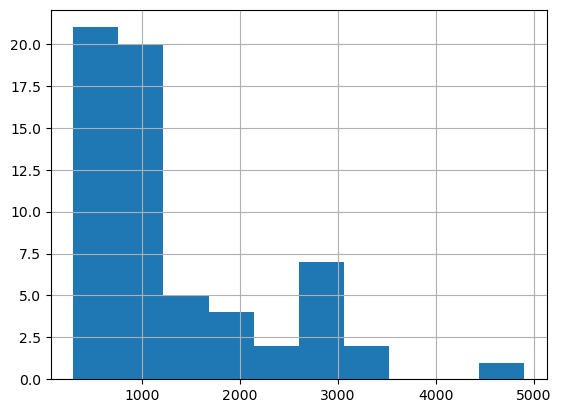

In [24]:
copiers = pd.read_csv('data_input/copiers.csv')
copiers['Sales'].hist();

Sekarang, mari kita buat sebuah model regresi linear sederhana untuk memprediksi `Profit` berdasarkan jumlah `Sales` data kita.

In [25]:
X = sm.add_constant(copiers['Sales'])
Y = copiers['Profit']

lm_outliers = sm.OLS(Y, X).fit()

Sebagai perbandingan, mari kita buat model tanpa outlier dengan mengambil data yang memiliki `Sales` di bawah 4000 (angka kasar yang diambil berdasarkan histogram sebelumnya).

In [26]:
copiers_no = copiers[copiers["Sales"] < 4000]

X = sm.add_constant(copiers_no['Sales'])
Y = copiers_no['Profit']

lm_no = sm.OLS(Y, X).fit()

Agar terlihat lebih jelas, kita akan membuat sebuah plot berdasarkan hasil kedua model di atas, berikut kodenya:

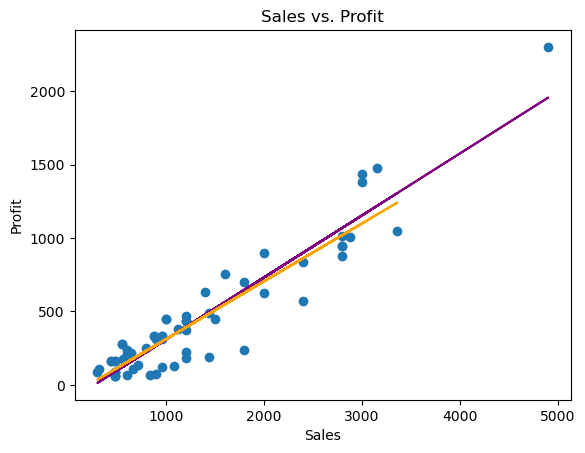

In [27]:
plt.scatter(copiers['Sales'], copiers['Profit'])
plt.plot(copiers['Sales'], lm_outliers.fittedvalues, c='purple')
plt.plot(copiers_no['Sales'], lm_no.fittedvalues, c='orange')

plt.xlabel('Sales')
plt.ylabel('Profit')
plt.title('Sales vs. Profit');

Perhatikan bahwa keberadaan outlier telah memengaruhi garis regresi kita, setidaknya terdapat pergeseran sudut antara garis berwarna ungu dengan garis berwarna jingga. Hal ini tentunya berdampak terhadap persamaan garis yang dibentuk dan kita bisa melihatnya dengan menampilkan kondisi konstanta kita serta R-squared kedua model untuk mengetahui kondisi mana yang lebih baik:

In [28]:
pd.DataFrame(
    {"condition": ["outlier", "without outlier"],
     "const": [lm_outliers.params[0], lm_no.params[0]],
     "Sales slope": [lm_outliers.params[1], lm_no.params[1]],
     "r-squared": [lm_outliers.rsquared, lm_no.rsquared]}
).set_index("condition")

,const,Sales slope,r-squared
condition,,,
outlier,-114.06251,0.42286,0.88281
without outlier,-83.54810,0.39444,0.85138


Outlier dikatakan memiliki **_high leverage_** jika nilai prediktornya (sumbu x) jauh dari rata-rata nilai prediktor tersebut. Dengan kata lain, jika sebuah nilai jauh dari kumpulan data lainnya, kita dapat menyebut prediktor tersebut memiliki _high leverage_. Keberadaan sebuah _high leverage_ memiliki potensi untuk mempengaruhi koefisien model regresi kita, seperti yang ditunjukkan pada tabel di atas. 

Katakanlah terdapat sebuah titik outlier yang sesuai dengan garis regresi yang dibentuk berdasarkan data lainnya. Pada kondisi ini dapat dikatakan outlier tersebut memiliki **_low influence_**.

Namun jika terdapat titik outlier lain yang memiliki _leverage_ yang sama (nilai x-nya sama jauhnya dari rata-rata pengamatan lainnya) dan menurunkan nilai R-squared secara signifikan serta merubah garis regresi dengan cukup jauh (ditunjukkan dengan perubahan nilai koefisien yang jauh), kita dapat menyebut kondisi ini sebagai **_high influence_**.

Apabila outlier yang kita miliki memiliki _low influence_ dan meningkatkan nilai R-squared maka sebaiknya outlier ini tetap digunakan dalam analisis kita. Sementara jika terdapat kondisi _high influence_ maka sebaiknya kita tidak menggunakan outlier pada analisis regresi kita.

Berdasarkan kedua kondisi di atas, tugas kitalah untuk mengidentifikasi kapan model regresi kita dipengaruhi oleh outlier yang secara buruk maupun baik. Kondisi ini dapat mengubah kemiringan garis yang dibentuk dan membuat analisis kita menjadi tidak berlaku.

# Multiple Linear Regression

Pada kasus sebelumnya, kita telah melakukan prediksi nilai y dengan input satu buah variabel x. Ingat kembali bahwa pada kasus tersebut y adalah `Profit` dan x adalah `Sales`. Model regresi ternyata tidak hanya bisa dibangun dari satu variabel prediktor saja, melainkan bisa memiliki banyak prediktor atau biasa disebut Multiple/Multivariate Linear Regression.

Kita akan menggunakan data lain yaitu `crime.csv` pada kasus ini. Data ini merupakan data yang digunakan kriminologis untuk mempelajari tingkat kriminalitas berdasarkan berbagai macam faktor. Kita akan membaca data dan mengganti nama-nama kolomnya agar lebih jelas.

In [29]:
crime = pd.read_csv("data_input/crime.csv", index_col=0)

crime.columns = ['percent_m', 'is_south', 'mean_education', 
                 'police_exp60', 'police_exp59', 'labour_participation',
                 'm_per1000f', 'state_pop', 'nonwhites_per1000', 'unemploy_m24',
                 'unemploy_m39', 'gdp', 'inequality', 'prob_prison', 'time_prison',  
                 'crime_rate']

crime.head()

,percent_m,is_south,mean_education,police_exp60,police_exp59,labour_participation,m_per1000f,state_pop,nonwhites_per1000,unemploy_m24,unemploy_m39,gdp,inequality,prob_prison,time_prison,crime_rate
1,151,1,91,58,56,510,950,33,301,108,41,394,261,0.08460,26.20110,791
2,143,0,113,103,95,583,1012,13,102,96,36,557,194,0.02960,25.29990,1635
3,142,1,89,45,44,533,969,18,219,94,33,318,250,0.08340,24.30060,578
4,136,0,121,149,141,577,994,157,80,102,39,673,167,0.01580,29.90120,1969
5,141,0,121,109,101,591,985,18,30,91,20,578,174,0.04140,21.29980,1234


Data ini dikumpulkan pada tahun 1960 dan deskripsi lengkapnya tidak benar-benar tersedia. Kita akan menggunakan deskripsi dari penulis library MASS. Variabel yang ada yaitu:

- `percent_m`: percentage of males aged 14-24 
- `is_south`: whether it is in a Southern state. 1 for Yes, 0 for No.
- `mean_education`: mean years of schooling
- `police_exp60`: police expenditure in 1960
- `police_exp59`: police expenditure in 1959 - labour_participation: labour force participation rate
- `m_per1000f`: number of males per 1000 females
- `state_pop`: state population
- `nonwhites_per1000`: number of non-whites resident per 1000 people
- `unemploy_m24`: unemployment rate of urban males aged 14-24
- `unemploy_m39`: unemployment rate of urban males aged 35-39
- `gdp`: gross domestic product per head
- `inequality`: income inequality
- `prob_prison`: probability of imprisonment
- `time_prison`: avg time served in prisons
- `crime_rate`: crime rate in an unspecified category

Pada kasus regresi linear, salah satu cara penentuan variabel yang baik digunakan adalah dengan melihat nilai korelasi antara setiap prediktor dengan target. Mari kita tinjau kondisi korelasi pada data kita.

In [30]:
crime.corr(numeric_only=True).sort_values(
   'crime_rate', ascending=False 
).loc[:,'crime_rate']

crime_rate              1.00000
police_exp60            0.68760
police_exp59            0.66671
gdp                     0.44132
state_pop               0.33747
mean_education          0.32283
m_per1000f              0.21391
labour_participation    0.18887
unemploy_m39            0.17732
time_prison             0.14987
nonwhites_per1000       0.03260
unemploy_m24           -0.05048
percent_m              -0.08947
is_south               -0.09064
inequality             -0.17902
prob_prison            -0.42742
Name: crime_rate, dtype: float64

Pada hasil pengecekan korelasi di atas, dapat kita lihat bahwa nilai korelasi antara police_exp59 dan 60 dengan crime_rate cukup tinggi. Lalu variabel lain yang bisa dikatakan cukup kuat adalah gdp dan prob_prison. Ingat bahwa nilai korelasi dikatakan kuat berdasarkan besarnya. Sementara, tanda negatif atau positif di awal nilai menunjukkan arah korelasinya.

Di luar variabel yang disebutkan di atas, mari kita coba gunakan beberapa variabel yang secara logika akan berdampak terhadap crime_rate seperti mean_education dan gdp.

In [31]:
Y = crime['crime_rate']
X = sm.add_constant(crime[['mean_education', 'gdp']])

lm_logic = sm.OLS(Y, X).fit()
lm_logic.params

const            -15.22189
mean_education    -0.14901
gdp                1.78165
dtype: float64

Berdasarkan model multivariate di atas, persamaan regresi yang dibentuk dengan kondisi ketiga variabel berhubungan linear, estimasi penggunaan bandwidth dapat dituliskan sebagai:

`Profit = -15.22 - 0.149 * mean_education + 1.78 * gdp`

Jika kita memiliki informasi kondisi suatu lokasi dengan mean_education sebesar 100 dan gdp 600, maka estimasi crime_rate kita yaitu:

In [32]:
-15.22 - 0.149 * 100 + 1.78 * 600

1037.88

In [33]:
lm_logic.predict([1, 100, 600])

array([1038.86656806])

Berdasarkan informasi yang sudah dipelajari model, jika kita mengetahui kondisi suatu lokasi dengan kriteria di atas maka kita dapatkan estimasi crime_rate sebesar 1038.86.

## Adjusted R-Squared

Penggunaan R-squared pada multivariate linear regression untuk melihat kesesuaian model dapat menyesatkan. Hal ini karena keterbatasan dari metrik R-squared yang nilainya akan selalu meningkat setiap bertambahnya jumlah prediktor. Apabila kita menambahkan variabel yang dengan nilai angka random, maka R-squared tidak akan berkurang. Akibatnya model dengan lebih banyak variabel prediktor mungkin terlihat lebih sesuai walaupun sebenarnya tidak demikian.

Kelemahan R-squared tersebut diatasi dengan menggunakan **Adjusted R-squared**. Adjusted R-squared memungkinkan kita untuk membandingkan model regresi data crime dengan 4 variabel dan 3 variabel untuk mencari tahu apakah model 4 variabel mencapai R-squared yang lebih tinggi hanya karena memiliki lebih banyak prediktor atau apakah memang hasilnya lebih sesuai.

Kita akan mencobanya dengan contoh berikut ini, yaitu dengan menggunakan tiga model yang prediktornya masing-masing berbeda jumlahnya. Nilai yang akan kita lihat nantinya adalah R-squared dan adjusted R-squared.

In [34]:
Y = crime['inequality']

# model 1
X_model1 = sm.add_constant(crime['gdp'])
model1 = sm.OLS(Y, X_model1).fit()

# model 2
X_model2 = sm.add_constant(crime[['gdp','mean_education']])
model2 = sm.OLS(Y, X_model2).fit()

# model 3
X_model3 = sm.add_constant(crime[['gdp','labour_participation','m_per1000f','time_prison']])
model3 = sm.OLS(Y, X_model3).fit()

# compare result
pd.DataFrame({
    'model': ['model1', 'model2', 'model3'],
    'r-squared': [model1.rsquared, model2.rsquared, model3.rsquared],
    'adj. r-squared': [model1.rsquared_adj, model2.rsquared_adj, model3.rsquared_adj]
})

,model,r-squared,adj. r-squared
0,model1,0.78145,0.77659
1,model2,0.81185,0.80330
2,model3,0.79388,0.77425


`model1` memiliki satu buah variabel prediktor (`gdp`) dan nilai R-squared sebesar 0.78145 (adjusted R-squared of 0.77659). Jika kita menambahkan tiga prediktor lain (`labour_participation`, `m_per1000f`, `time_prison`) yaitu pada `model3`, nilai R-squared model kita meningkat menjadi 0.79388. Katakanlah R-squared mengindikasikan kualitas kesesuaian model, apakah hal ini berarti model3 merupakan model yang lebih baik dari model1? Jawabannya adalah tidak, karena dengan menambahkan tiga buah variabel, nilai adjusted R-squared kita berkurang menjadi 0.77425.

Sebagai rangkuman, nilai R-squared menandakan seberapa baik model kita menggambarkan data asli. Nilai ini mengukur sejauh mana varian dalam variabel dependent kita (inequality) dapat dijelaskan oleh variabel independent (gdp, dll). Namun seiring dengan peningkatan jumlah variabel independent yang digunakan, nilai R-squared model kita juga akan meningkat karena gabungan informasi penting serta noise dari seluruh variabel.

Di sisi lain, adjusted R-squared nilainya tidak meningkat seperti R-squared karena adanya faktor penyesuaian berdasarkan jumlah variabel prediktor dalam model kita. Nilai ini hanya akan meningkat ketika variabel baru benar-benar menghasilkan prediksi yang lebih baik. Meskipun detail matematis dari rumus adjusted R-squared di luar ranah _course_ ini, kita akan membahas bukti singkat bahwa nilai Adjusted R-squared dikenakan penalti berdasarkan jumlah prediktornya.

Berikut ini adalah formula dari perhitungan adjusted R-squared:

$$R^2_{adj} = 1-(1-R^2)\frac{n-1}{n-p-1}$$

Pada formula tersebut, diketahui bahwa _n_ adalah jumlah observasi dan _p_ adalah jumlah prediktor. Perhatikan bahwa jika nilai _p_ meningkat maka nilai di bagian pecahan akan menjadi lebih besar dan menurunkan nilai keseluruhan dari adjusted R-squared.

Jika penjelasan di atas kurang jelas, kami telah menyediakan kode yang dapat diubah-ubah nilai jumlah prediktornya.

In [33]:
# jumlah prediktor
no_of_preds = 4

# perhitungan adjusted r-squared
adjusted_model3 = 1 - (1-model3.rsquared) * (crime.shape[0]-1) / (crime.shape[0]-1-no_of_preds)

adjusted_model3

0.7742470048366594

# Encoding

Sampai tahap ini, kita hanya bisa menggunakan variabel bertipe numerik sebagai prediktor pada model kita. Hal ini dikarenakan Python hanya mampu memproses informasi numerik sementara variabel bertipe kategorikal atau _object_ harus melalui tahap _pre-processing_ yang disebut dengan **_Encoding_**.

Terdapat beberapa jenis _encoding_ yang dapat digunakan, tetapi pada _course_ ini kita hanya akan mempelajari satu jenis yaitu **_dummy variable encoding_**. _Dummy variable encoding_ adalah metode lanjutan dari jenis encoding lain bernama _one-hot encoding_ yang melakukan transformasi pada variabel kategorikal kita dan mengubahnya menjadi beberapa kolom sesuai jumlah kategori kita dengan informasi biner.

Karena informasi dari _one-hot encoding_ ini bersifat redundan (berulang), maka salah satu kolomnya akan dibuang. Inilah yang disebut sebagai **_dummy variable encoding_**. Berikut adalah penggambaran dari penjelasan di atas.

![](assets/one_hot-dummy.png)

Untuk melakukan **_dummy variable encoding_** kita menggunakan fungsi  `.get_dummies()` dari library pandas. Kali ini kita akan kembali menggunakan data copiers kita dengan membuang beberapa variabel yang tidak terlalu penting untuk saat ini.

In [35]:
copiers_clean = copiers.drop(columns=["Order.ID", "Order.Date", "Ship.Date", 
                                "Customer.ID", "Product.ID", "Category", 
                                "Sub.Category", "Product.Name"])
cat_var = copiers_clean.select_dtypes(exclude='number').columns.to_list()

copiers_enc = pd.get_dummies(copiers_clean, 
                               columns = cat_var,
                               drop_first = True,
                               dtype='int64')

copiers_enc.head()

,Sales,Quantity,Discount,Profit,Ship.Mode_Same Day,Ship.Mode_Second Class,Ship.Mode_Standard Class,Segment_Corporate,Segment_Home Office
0,959.98400,2,0.20000,335.99440,0,1,0,0,0
1,1799.97000,3,0.00000,701.98830,0,1,0,0,0
2,1199.97600,3,0.20000,434.99130,0,0,1,0,0
3,2999.95000,5,0.00000,1379.97700,0,0,1,0,1
4,1199.97600,3,0.20000,434.99130,0,0,1,0,0


Setelah melalui tahap _encoding_ maka data kita sudah dapat digunakan untuk pembuatan model regresi. Pada kasus selanjutnya kita akan membuat model regresi menggunakan seluruh prediktor yang dimiliki oleh data kita.

In [36]:
Y = copiers_enc['Profit']
X_enc = sm.add_constant(copiers_enc.drop(columns=['Profit']))

lm_all = sm.OLS(Y, X_enc).fit()

lm_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     130.1
Date:                Thu, 21 Dec 2023   Prob (F-statistic):           4.85e-32
Time:                        18:01:58   Log-Likelihood:                -370.30
No. Observations:                  62   AIC:                             758.6
Df Residuals:                      53   BIC:                             777.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       63.4520     55.064      1.152      0.254     -46.992     173.896
Sales                        0.4212      0.025     16.701      0.000       0.371       0.472
Quantity                   -13.4098     13.545     -0.990      0.327     -40.578      13.758
Discount                  -874.8310    117.023     -7.476      0.000   -1109.550    -640.112
Ship.Mode_Same Day           9.1379     57.485      0.159      0.874    -106.163     124.439
Ship.Mode_Second Class      42.9716     43.926      0.978      0.332     -45.132     131.075
Ship.Mode_Standard Class    13.9212     38.335      0.363      0.718     -62.969      90.812
Segment_Corporate            9.3012     31.294      0.297      0.767     -53.467      72.070
Segment_Home Office        -30.7099     39.860     -0.770      0.444    -110.660      49.240
==============================================================================
Omnibus:                        1.946   Durbin-Watson:                   2.172
Prob(Omnibus):                  0.378   Jarque-Bera (JB):                1.192
Skew:                          -0.271   Prob(JB):                        0.551
Kurtosis:                       3.410   Cond. No.                     1.55e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.55e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Ingat kembali bahwa kita dapat melakukan interpretasi pada nilai **coef** atau koefisien. Untuk variabel dengan tipe awal numerik, kita dapat menyimpulkan suatu koefisien sebagai berikut:

- Profit diekspektasikan **meningkat** sebesar $0.4212$ USD setiap kenaikan `Sales`sebesar $1$ satuan.
- Profit diekspektasikan **menurun** sebesar $874.8310$ USD ketika `Discount` yang diberikan naik $1$ tahun.

Sementara untuk variabel dengan tipe awal kategorik, kita akan melakukan interpretasi yang berbeda dan ini berhubungan dengan _dummy variable encoding_ yang telah kita lakukan. Ingat kembali bahwa pada _dummy variable encoding_ kita membuang satu buah kategori untuk setiap kolomnya. Kolom yang terbuang ini secara default merupakan kategori dengan huruf alfabet yang paling awal muncul. Contohnya jika terdapat satu variabel dengan kategori High, Normal, dan Low maka kategori yang akan dihilangkan adalah High karena huruf H muncul lebih dahulu dibanding N dan L. 

Sebagai contoh kasus di data kita, variabel `Gender` memiliki tiga kategori yaitu Female, Male, dan Nonbinary. Kategori yang hilang pada variabel ini adalah Female tetapi informasinya sebenarnya ditangkap oleh koefisien **const**. Oleh karena itu, cara kita menginterpretasikan suatu variabel kategorik adalah dengan membandingkannya dengan kategori yang ditangkap oleh koefisien **const**:

- Profit diekspektasikan **meningkat** sebesar $9.3$ USD ketika Segment bertipe `Home Office` dibandingkan dengan Segment bertipe `Consumer` dengan catatan variabel lain bernilai tetap.
- Profit diekspektasikan **menurun** sebesar $30.71$ USD ketika Segment bertipe `Corporate` dibandingkan dengan Segment bertipe `Consumer` dengan catatan variabel lain bernilai tetap.
- Profit diekspektasikan **meningkat** sebesar $42.97$ USD ketika Ship.Mode bertipe `Second Class` dibandingkan dengan Ship.Mode bertipe `First Class` dengan catatan variabel lain bernilai tetap.

# Regression Model Evaluation

Pada beberapa kasus kita akan memilih beberapa model dengan skema yang berbeda, perbedaan yang normal terjadi adalah penggunaan jumlah variabel yang berbeda. Penting bagi kita untuk melakukan evaluasi berbagai performa model tersebut untuk menentukan model dengan kesalahan (_error_) terkecil. Berikut ini beberapa metrik untuk kita menghitung kesalahan/_error_: 

- [**_Mean Absolute Error_**](https://www.statsmodels.org/dev/generated/statsmodels.tools.eval_measures.meanabs) (MAE): Memperlakukan error dengan lebih ringan.
$$MAE = \frac{1}{N} \sum_{i=1}^{N} \left | y_{i} - \hat{y} \right |$$

- [**_Root Mean Squared Error_**](https://www.statsmodels.org/dev/generated/statsmodels.tools.eval_measures.rmse) (RMSE): Memperlakukan error dengan lebih sensitif. Ketika nilai error besar, maka nilai RMSE akan semakin besar dan sebaliknya.
$$RMSE = \sqrt{\frac{\sum_i^{n}(Predicted_i-Actual_i)^2}{n}}$$

- [**_Mean Absolute Percentage Error_**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_percentage_error) (MAPE): Menunjukan seberapa besar penyimpangan error dalam bentuk persentase.
$$MAPE = \frac{1}{N} \sum_{i=1}^{N} \frac {\left | y_{i} - \hat{y} \right |} {y}$$

__Note__: RMSE digunakan ketika model yang dibuat memuat observasi outlier. Sedangkan, MAE digunakan ketika model yang dibuat tidak memuat observasi outlier. MAPE adalah metrik yang baik untuk interpretasi karena mudah dipahami. Ketiganya bisa diinterpretasikan dan metrik paling aman digunakan jika kita mengerti formula perhitungannya adalah RMSE.

Pada kasus ini, kita akan meninjau model kita berdasarkan nilai RMSE-nya. Library `statsmodels` memiliki fungsi `rmse` yang dapat digunakan untuk menghitung nilai RMSE:

In [39]:
from statsmodels.tools.eval_measures import rmse

# predict data with different models
y_simple = lm_simple.predict(X_simple)
y_all = lm_all.predict(X_enc)

# compare the rmse
pd.DataFrame({'RMSE': [rmse(Y, y_simple), rmse(Y, y_all)]},
             index= ['Model 1', 'Model 2'])

,RMSE
Model 1,147.69971
Model 2,94.97767


#  Limitations of Regression Models

Walaupun model regresi linear merupakan metode yang sangat _powerful_ untuk menyelesaikan berbagai masalah data science, metode ini masih memiliki batasan secara statistik.

- Regresi linear baik untuk data yang memiliki hubungan linear antara prediktor dengan target.
- Model regresi simple/multiple mungkin sensitif terhadap data outliers.
- Model regresi simple/multiple mengasumsikan bahwa variabel prediktor tidak berkorelasi tinggi satu sama lain

Oleh karena batasan tersebut, ketika membuat prediksi variabel target menggunakan regresi linear **kita harus memenuhi beberapa asumsi sebagai syarat agar model regresi yang kita tepat secara statistik**. Beberapa asumsi yang harus dipenuhi dalam model regresi linear adalah:

1. _Linear prediction variables for target variables_
2. _Normality of residuals_
3. _Residuals have no heteroscedasticity_
4. _Little to no multicollinearity_

## Linearity

**Dilakukan sebelum membuat model**. Untuk menguji apakah variabel target dan prediktor memiliki hubungan linear. Dapat dilihat dengan nilai **korelasi**. 

_Linearity_ artinya target variabel dengan prediktornya memiliki hubungan yang linear atau hubungannya bersifat garis lurus. Selain itu, efek atau nilai koefisien antar variabel bersifat additive. Jika _linearity_ ini tidak terpenuhi, maka otomatis semua nilai koefisien yang kita dapatkan tidak valid karena model berasumsi bahwa pola yang akan kita buat adalah linear.

## Normality of Residuals

Ingat kembali bahwa kita akan selalu melihat perbedaan antara data target asli dengan hasil prediksi/_fitted values_ kita. Perbedaan ini sudah dibahas di atas dengan sebutan _error_ atau nama lainnya adalah residual. Asumsi _normality_ menyebutkan bahwa residual dari model regresi linear sebaiknya berdistribusi normal. Artinya residual banyak berkumpul di sekitar angka 0. Untuk mengecek apakah residual model kita berdistribusi normal terdapat beberapa uji statistik, salah satunya adalah Shapiro-Wilk test. Pengujian statistik ini memiliki uji hipotesis sebagai berikut:

- $H_0$: Residual berdistribusi normal
- $H_1$: Residual tidak berdistribusi normal

Dalam melakukan pengujiannya kita akan dibantu library `scipy` dan memanfaatkan fungsi `shapiro()`. Untuk memanfaatkan fungsi tersebut, kita akan mengeluarkan nilai residu dari model yang sudah dibuat dengan menambahkan `.resid` pada objek model yang dibuat.

In [40]:
from scipy.stats import shapiro

name = {0: 'Statistics',1: 'p-value'}
pd.DataFrame({shapiro(lm_all.resid)}).rename(columns=name)

,statistic,pvalue
0,0.98628,0.71771


Pada uji statistik ini nilai yang perlu kita perhatikan adalah p-value sehingga dan nilai yang kita harapkan adalah p-value lebih besar dari alpha (0.05). Ketika kita mendapatkan nilai p-value > 0.05 maka uji hipotesis kita akan gagal menolak H0.

Berdasarkan hasil dari Shapiro-Wilk test kita didapatkan nilai p-value > 0.05 artinya kita gagal tolak H0 yang menandakan residual model kita berdistribusi normal.

Tetapi, terdapat sebuah catatan dari dokumentasi official fungsi ini yaitu jika data kita berjumlah lebih dari 5000 nilai statistik yang dihasilkan masih akurat tetapi tidak dengan nilai p-valuenya.

Oleh karena itu, kita harus sadar akan keterbatasan metode ini dan menggunakan metode tambahan untuk memverifikasi hasil kita, seperti memeriksa distribusi data secara visual.

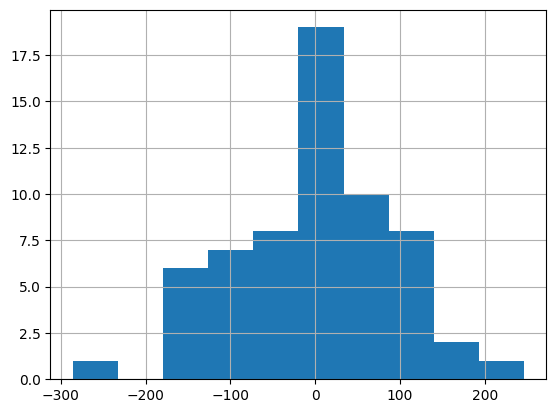

In [41]:
lm_all.resid.hist();

### [Optional] Interpret the Residual Normality Indicators from `sm` results

Selain menggunakan Shapiro-Wilk test kita dapat juga melihat summary model untuk melihat normalitas dari residual data kita, yaitu dengan meninjau:

- **Omnibus/Prob(Omnibus)** - Tes skewness dan kurtosis dari residual. Nilai yang mendekati 0 menunjukkan normalitas. Prob (Omnibus) melakukan uji statistik pada probabilitas residual yang terdistribusi normal. Nilai yang mendekati 1 menunjukkan probabilitas bahwa residual berdistribusi normal.

- **Skew** – Mengukur kesimetrian data. Nilai yang mendekati 0 menunjukkan residual berdistribusi normal.

- **Jarque-Bera/Prob(JB)** – 
Nilar 6 atau lebii menunjukkan bahwaresidualn tidakbterdistribusi normal dan hipotesis nol normalitas telah ditolak pada tingkat signifikansi 5 (alpha 0.05)%. Nilai yang mendekati 0 menunjukkan bahwa data terdistribusi normal.


In [42]:
lm_all.summary().tables[2]

Omnibus:,1.946,Durbin-Watson:,2.172
Prob(Omnibus):,0.378,Jarque-Bera (JB):,1.192
Skew:,-0.271,Prob(JB):,0.551
Kurtosis:,3.410,Cond. No.,1.55e+04


## No-Heteroscedasticity

Selain harus berdistribusi normal, residual kita juga harus bersifat homogen yang artinya tersebar tanpa pola. Jika data residual kita tidak membentuk pola, artinya model regresi linear kita sudah cukup menjelaskan data kita.

Plot residual adalah sebuah plot yang menampilkan nilai residual pada sumbu y dan nilai _fitted values_ pada sumbu x. Pada plot tersebut kita dapat melihat apakah terdapat pola yang mengindikasikan pelanggaran pada asumsi model kita dan berpengaruh pada nilai standar error pada estimasi/koefisien prediktor.

Plot yang diharapkan adalah plot yang memiliki titik-titik data yang menyebar secara acak di sekitar sumbu x. Hal ini tidak berarti model kita sempurna, tetapi model regresi yang kita pakai secara tepat menggambarkan variasi dalam variabel prediktor kita. Apabila nantinya terdapat pola tertentu maka model ini sebaiknya diperbaiki atau bisa dikatakan tidak memenuhi hubungan linear prediktor dengan target.

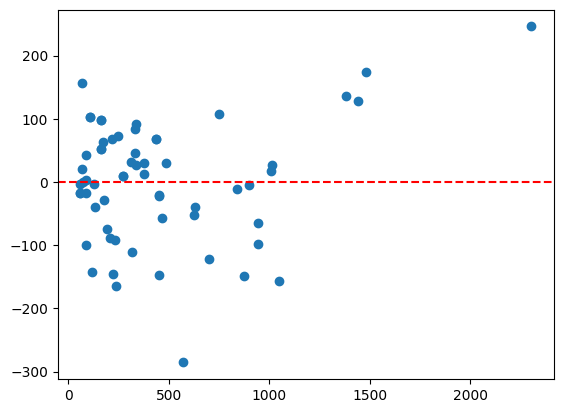

In [43]:
plt.scatter(x = copiers['Profit'], y = lm_all.resid);
plt.axhline(y=0, color='r', linestyle='--');

Karena jika melihat visualnya saja terkadang terdapat subjektivitas, kita juga bisa melakukan pengecekan menggunakan uji Breuch-Pagan. Pada uji Breuch-Pagan ini kita memiliki uji hipotesis berikut:

- $H_0$: residual homogen(tidak membentuk sebuah pola/acak)
- $H_1$: residual heteros (membentuk sebuah pola)

Kita bisa menggunakan method `het_breuschpagan()` dari library `statsmodels`.

In [44]:
import statsmodels.stats.api as sms

name = {0: 'Lagrange multiplier statistic',
       1: 'p-value',
       2: 'f-value',
       3: 'f p-value'}

pd.DataFrame({
    sms.het_breuschpagan(lm_all.resid, lm_all.model.exog)
}).rename(columns= name)

,Lagrange multiplier statistic,p-value,f-value,f p-value
0,21.53229,0.00586,3.52507,0.00245


Berdasarkan hasil dari uji Breuch-Pagan kita mendapatkan nilai p-value < 0.05 artinya kita tolak H0 yang menandakan residual model tidak berpola acak atau disebut sebagai _heteroscedastisity_.

## No Multicolinearity

Dalam formula regresi linear, kita mengasumsikan bahwa tidak ada korelasi antara variabe prediktor agar dapat memiliki efek independen dari setiap variabel. Salah satu metode statistik yang dapat digunakan saat menilai _multicollinearity_ adalah Variance Inflation Factor (VIF). Secara sederhana, VIF adalah cara untuk mengukur efek _multicollinearity_ di antara prediktor dalam model kita.

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

x = copiers.select_dtypes(include="number").drop(columns=["Profit"])
xc = sm.add_constant(x)

vif = [variance_inflation_factor(xc.values, i) for i in range(len(xc.columns))]
pd.Series(data=vif, index=xc.columns).sort_values(ascending=False)

const      6.36132
Sales      3.11759
Quantity   3.00142
Discount   1.13280
dtype: float64

Keterbatasan dari berbagai model _machine learning_ adalah hal yang akan kita tinjau lagi seiring perjalanan pembelajaran kita. Kita tidak hanya akan belajar bagaimana mengidentifikasinya tetapi kita juga akan mempelajari berbagai teknik untuk mengatasinya, mencegah _overfitting/underfitting_, dan membuat diagnosis model menjadi bagian penting dari pembelajaran metode _machine learning_ ini.